In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [56]:
df = pd.read_excel("Superstore_Sales_Records.xls",index_col="Order Date", parse_dates=True)

df.head(2)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [57]:
df = df[["Sales", "Profit"]]

df.sort_index()

,Sales,Profit
Order Date,,
2014-01-03,16.448,5.5512
2014-01-04,11.784,4.2717
2014-01-04,272.736,-64.7748
2014-01-04,3.540,-5.4870
2014-01-05,19.536,4.8840
...,...,...
2017-12-30,3.024,-0.6048
2017-12-30,52.776,19.7910
2017-12-30,90.930,2.7279


<Axes: xlabel='Order Date'>

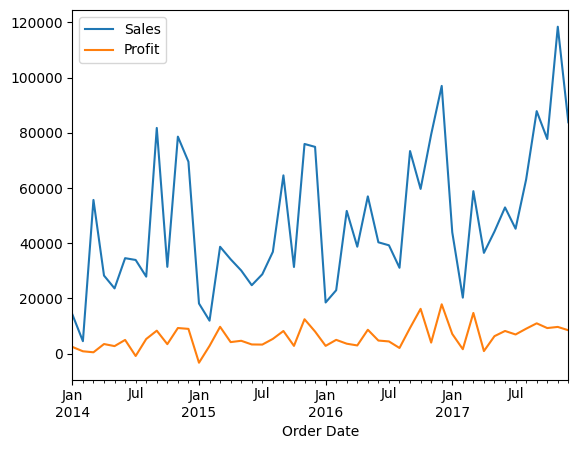

In [64]:
df = df.groupby("Order Date").sum().resample("MS").sum()
df.plot()

<Axes: xlabel='Order Date'>

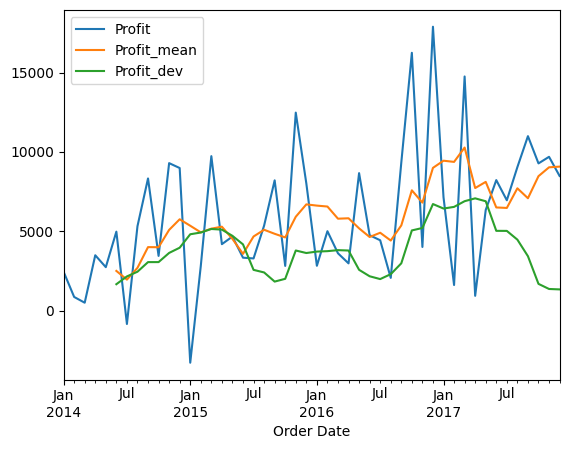

In [70]:
# Profit

df_profit = df[["Profit"]]


df_profit["Profit_mean"] = df["Profit"].rolling(6).mean()
df_profit["Profit_dev"] = df["Profit"].rolling(6).std()
df_profit[:12*10].plot() 

In [81]:
from statsmodels.tsa.stattools import adfuller
p=adfuller(df_profit["Profit"])[1]
f"P-Level: {p} <= 0.05 --> {p < 0.05}"

'P-Level: 0.054320054839669805 <= 0.05 --> False'

<Axes: xlabel='Order Date'>

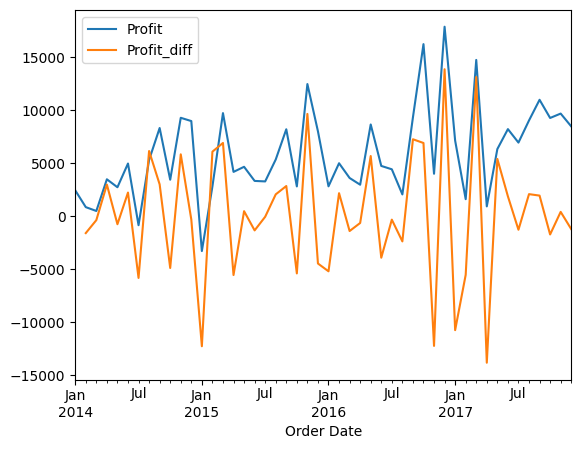

In [ ]:
df_profit["Profit_diff"] = df_profit["Profit"].diff()
df_profit_diff = df_profit["Profit_diff"].copy()


df_profit_diff["_mean"] = df_profit_diff["Profit_diff"].rolling(12).mean()